In [3]:
# Classification Examples

# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

# Load data
data = pd.read_csv('data/mushrooms.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
clean_data = data.copy()

# Rename the outcome column to poisonous and non-poisonous
clean_data = clean_data.rename(columns={'class': 'poisonous'})
clean_data['poisonous'] = clean_data['poisonous'].replace({'p': 'poisonous', 'e': 'non-poisonous'})

# Remove any columns that have only one value type
print('How many different values do the columns have?')
for column in clean_data.columns:
    print(f'   {column}: {len(clean_data[column].unique())}')
clean_data = clean_data.drop(columns='veil-color')
print()

# Final input data
print(f'The final categories are:')
clean_data.info()

How many different values do the columns have?
   poisonous: 2
   cap-shape: 6
   cap-surface: 4
   cap-color: 10
   bruises: 2
   odor: 9
   gill-attachment: 2
   gill-spacing: 2
   gill-size: 2
   gill-color: 12
   stalk-shape: 2
   stalk-root: 5
   stalk-surface-above-ring: 4
   stalk-surface-below-ring: 4
   stalk-color-above-ring: 9
   stalk-color-below-ring: 9
   veil-type: 1
   veil-color: 4
   ring-number: 3
   ring-type: 5
   spore-print-color: 9
   population: 6
   habitat: 7

The final categories are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   obje

#### Preparing the data
`train_test_split` to create the training and testing data 

In [13]:
# Separate out classfiers
X = data.copy().drop(columns=['class'])
y = data.copy()['class']

# Create dummy variables for all columns in X
X = pd.get_dummies(X, drop_first=False)

# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


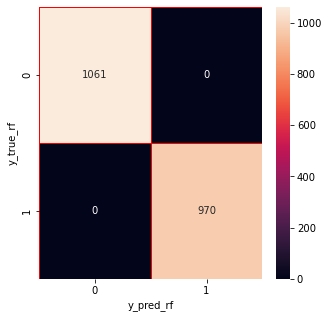

In [17]:
import seaborn as sns

y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()